# Spotify - Database prediction

### With this database, i'd like to introduce in what i have created. any missunderstanding on the code or opportunity to make it better that you see, give an issue and explain for i can continue improving it more and more. 

Machine learning

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print('The libs are imported')

The libs are imported


Import the libs that i used to create the prediction.


In [5]:
caminho = "C:\\Users\\Bruno Birello\\Downloads\\spotify_top_songs_audio_features.csv\\spotify_top_songs_audio_features.csv"
db = pd.read_csv(caminho)
db.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
5,00EPIEnX1JFjff8sC6bccd,"Thalia, NATTI NATASHA",No Me Acuerdo,Sony Music Latin,G,Minor,4 beats,0.836,0.799,0.0873,0.18700,0.000000,0.0920,0.772,-4.247,94.033,217653,16,98123727
6,00ETaeHUQ6lops3oWU1Wrt,"Kygo, Donna Summer",Hot Stuff,RCA Records Label,F,Major,4 beats,0.681,0.773,0.1480,0.01900,0.000001,0.1100,0.429,-5.749,119.961,199008,1,4569978
7,00ZKeP47bZtswtANkvxz2j,"Tropa do Bruxo, DJ Ws da Igrejinha, SMU, Triz,...",Baile do Bruxo,Tropa Do Bruxo,G,Minor,5 beats,0.734,0.228,0.5300,0.88900,0.006420,0.1020,0.522,-4.731,162.524,221538,3,27916960
8,00gpGR84M27moP7AFuqHIx,YBN Nahmir,Bounce Out With That,2018,G#/Ab,Major,4 beats,0.857,0.560,0.1730,0.04260,0.000000,0.1530,0.482,-8.278,94.949,91011,6,4913180
9,00imgaPlYRrMGn9o83hfmk,Brent Faiyaz,LOOSE CHANGE,"Lost Kids LLC., Marketed by Venice / Stem",C#/Db,Minor,4 beats,0.574,0.369,0.0814,0.75300,0.000000,0.1470,0.440,-8.931,84.975,226011,1,5854629


Now with the libs imported, we should read our CSV.dataset to know what we have and continue exploring the data 

In [8]:
db.drop('id', axis=1)

,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,Taylor Swift,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160.000,208198,1,17583532
6509,"Young Thug, A$AP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82.582,210907,2,10526635
6510,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99.010,236666,1,5404939
6511,"Kendrick Lamar, Tanna Leone",Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,0.3120,0.28300,0.000028,0.3920,0.258,-8.616,174.025,210841,1,12872010


Removing the column that we'll not use

In [9]:
db.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03
mean,0.681731,0.636522,0.121933,0.236761,0.012469,0.180168,0.492412,-6.350667,122.117244,202566.684170,13.614924,1.089647e+08
std,0.141787,0.164813,0.113441,0.244784,0.075151,0.138054,0.227001,2.536114,29.416097,49199.592333,24.084051,2.276695e+08
min,0.150000,0.021800,0.023200,0.000008,0.000000,0.019700,0.032000,-34.475000,46.718000,30133.000000,1.000000,2.525159e+06
25%,0.591000,0.534000,0.044000,0.044400,0.000000,0.097400,0.316000,-7.564000,98.007000,173038.000000,1.000000,8.695060e+06
50%,0.698000,0.651000,0.072200,0.145000,0.000000,0.124000,0.489000,-5.983000,120.034000,198367.000000,4.000000,2.712856e+07
75%,0.785000,0.759000,0.163000,0.356000,0.000041,0.219000,0.669000,-4.673000,142.025000,226003.000000,16.000000,9.951456e+07
max,0.985000,0.989000,0.966000,0.994000,0.953000,0.977000,0.982000,1.509000,212.117000,690732.000000,367.000000,3.528450e+09


Describe the data column by column for we can see with we have any null line

In [6]:
lista = [
'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo', 'duration_ms'
]
x = db[lista]
y = db.streams

Separating the columns for those that we'll use to fit and predict our database

In [10]:
train_x, test_x, train_y, test_y = train_test_split(x, y)
modelo = DecisionTreeRegressor(max_leaf_nodes=100)
modelo.fit(train_x, train_y)

DecisionTreeRegressor(max_leaf_nodes=100)

creating our model and fitting with our training var that we created

In [26]:
from sklearn.metrics import mean_absolute_error
test_predicitions = modelo.predict(test_x)
test_mae = mean_absolute_error(test_predicitions, test_y)
print('Our MAE are:',test_mae)

Our MAE are: 137688529.34740907


Calculating ou mean absolute error and predicting what the ML studied

Analyct

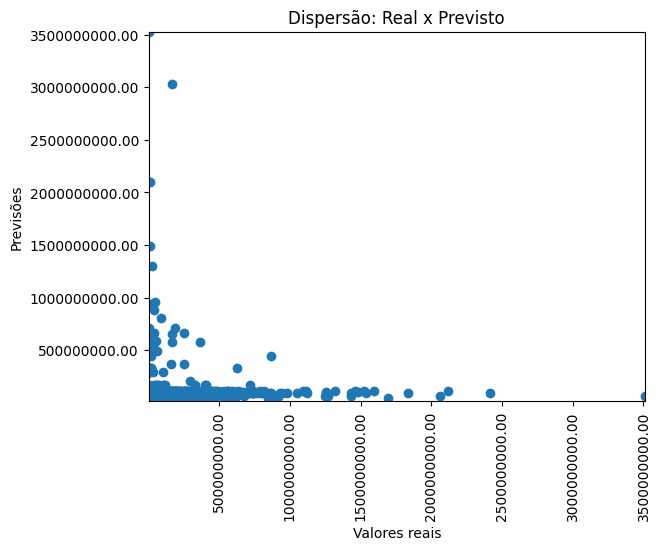

In [27]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as pp
pp.scatter(test_y, test_predicitions)
pp.xlabel('Valores reais')
pp.ylabel('Previsões')
pp.title('Dispersão: Real x Previsto')
pp.xlim(min(test_y), max(test_y))
pp.ylim(min(test_predicitions), max(test_predicitions))
pp.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
pp.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
pp.xticks(rotation='vertical')
pp.show()

A single and lonely plot that show the real vs the predicted streaming, using as ref the columns in database